# Description

**Background and Context**

Businesses like banks that provide service have to worry about the problem of 'Churn' i.e. customers leaving and joining another service provider. It is important to understand which aspects of the service influence a customer's decision in this regard. Management can concentrate efforts on the improvement of service, keeping in mind these priorities.

**Objective**

Given a Bank customer, build a neural network-based classifier that can determine whether they will leave or not in the next 6 months.

**Data Description**

The case study is from an open-source dataset from Kaggle. The dataset contains 10,000 sample points with 14 distinct features such as CustomerId, CreditScore, Geography, Gender, Age, Tenure, Balance, etc.

**Data Dictionary**
* RowNumber: Row number.
* CustomerId: Unique identification key for different customers.
* Surname: Surname of the customer
* Credit Score: A credit score is a measure of an individual's ability to pay back the borrowed amount. It is the numerical representation of their creditworthiness. A credit score is a 3-digit number that falls in the range of 300-900, 900 being the highest.
* Geography: The country to which the customer belongs.
* Gender: The gender of the customer.
* Age: Age of the customer.
* Tenure: The period of time a customer has been associated with the bank.
* Balance: The account balance (the amount of money deposited in the bank account) of the customer.
* NumOfProducts: How many accounts, bank account affiliated products the person has.
* HasCrCard: Does the customer have a credit card through the bank?
* IsActiveMember: Subjective, but for the concept
* EstimatedSalary: Estimated salary of the customer.
* Exited: Did they leave the bank after all?

# Reading Dataset and Feature Elimination

## Importing all necessary libraries

In [1]:
# Importing and displaying tensorflow used version
import tensorflow as tf
print(tf.__version__)

2.5.0


In [2]:
# Importing python libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, recall_score, precision_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import optimizers

## Importing dataset

In [3]:
data = pd.read_csv('bank.csv', index_col='RowNumber')

In [4]:
data.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,,,
1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## Dataset overview

In [5]:
data.shape

(10000, 13)

* The dataset includes data from 10,000 customers with 13 columns representing different parameters.

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1.1+ MB


* The data is mostly numerical except for the `Surname` which is a text variable, `Geography` and `Gender` which are categorical text variables.

## Null values

In [5]:
data.isna().sum()

CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

* There are no null values

## Feature elimination

In [6]:
data['CustomerId'].nunique()

10000

* ```CustomerId``` is a unique identification key for each customer, therefore it does not provide any relevant information for the model's prediction.
* Likewise ```Surname``` can also be dropped as it does not provide any relevant information for the model.

In [7]:
# Dropping customer's id and surname
data.drop(['CustomerId', 'Surname'], axis=1, inplace=True)

# EXPLORATORY DATA ANALYSIS (EDA)

## Dataset description

In [8]:
# Dataset statistical overview
data.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


* Out of the 10,000 customers, only 20.3% have left the bank. The dataset is therefore imbalanced
* The ```credit score``` ranges from 350 to 850 with an average of 650.5.
* Customers ```Age``` ranges from 18 to 92 years old with an average of 38.9.

In [9]:
# Displaying geographies
data['Geography'].unique().tolist()

['France', 'Spain', 'Germany']

* ```Geography``` is a categorical variable reflecting the customer's country: France, Spain or Germany

In [10]:
# Displaying Genders
data['Gender'].unique().tolist()

['Female', 'Male']

* ```Gender``` is a categorical variable and can take only two values: Female or Male

## Univariate analysis

In [11]:
# Function that will create boxplot and histogram for any input numerical variable.
# This function takes the numerical column as the input and returns the boxplots and histograms for the variable.
def histogram_boxplot(feature, figsize=(15,4), bins = None):
    """ Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (15,4))
    bins: number of bins (default None / auto)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot grid= 2
                                           sharex = True, # x-axis will be shared among all subplots
                                           gridspec_kw = {"height_ratios": (.25, .75)}, 
                                           figsize = figsize 
                                           ) # creating the 2 subplots
    sns.boxplot(x=feature, data=data, ax=ax_box2, showmeans=True, color='violet') # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(x=feature, data=data, kde=False, ax=ax_hist2, bins=bins,palette="winter") if bins else sns.histplot(x=feature, data=data, kde=False, ax=ax_hist2) # For histogram
    ax_hist2.axvline(data[feature].mean(), color='green', linestyle='--') # Add mean to the histogram
    ax_hist2.axvline(data[feature].median(), color='black', linestyle='-') # Add median to the histogram

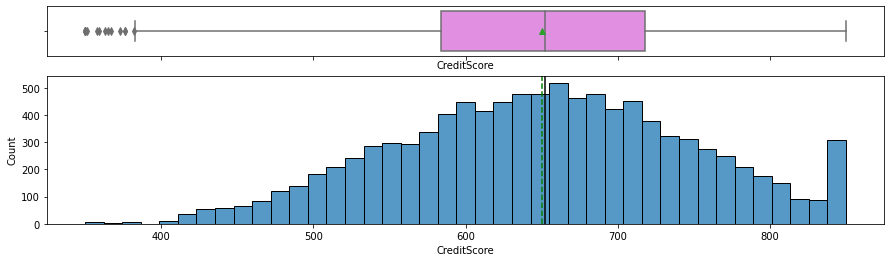

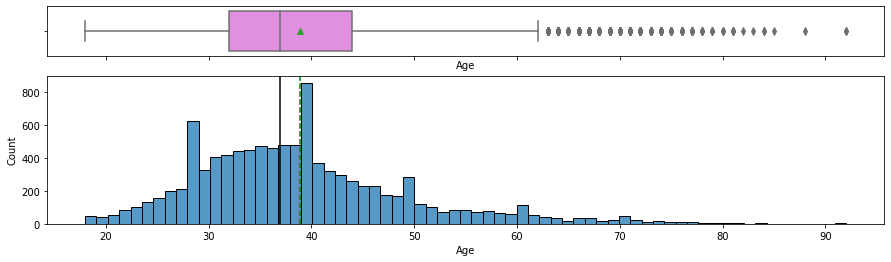

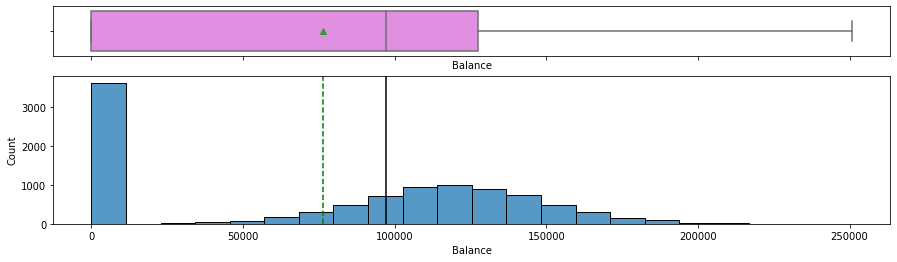

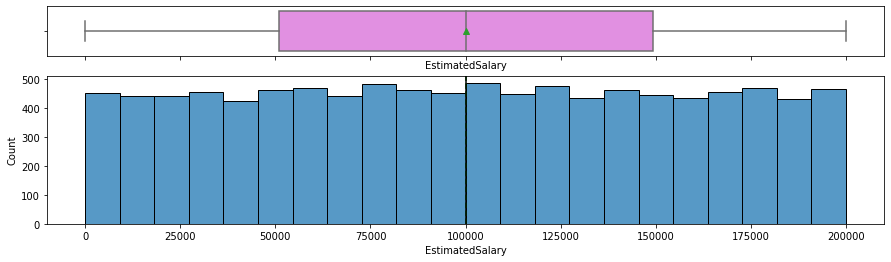

In [12]:
for var in ['CreditScore', 'Age', 'Balance', 'EstimatedSalary']:
    histogram_boxplot(var)

In [13]:
def perc_on_bar(feature, figsize=(10,3)):
    '''
    plot
    feature: categorical feature
    the function won't work if a column is passed in hue parameter
    '''
    total = len(data[feature]) # length of the column
    plt.figure(figsize=figsize)
    ax = sns.countplot(x=feature, data=data)
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - .05 # width of the plot
        y = p.get_height() + 30         # hieght of the plot
        ax.annotate(percentage, (x, y), size = 12) # annotate the percantage
    plt.show()

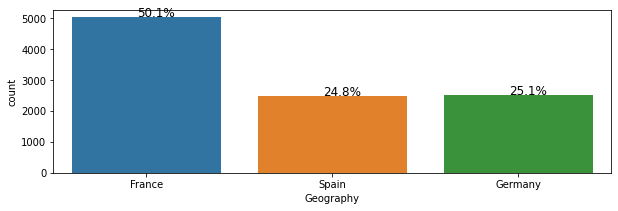

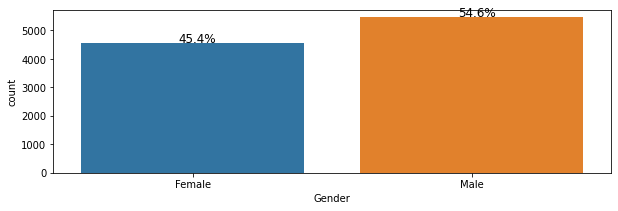

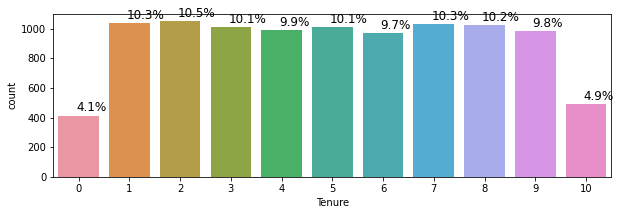

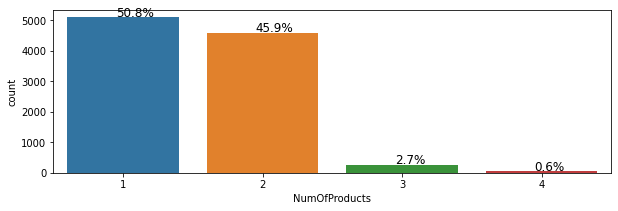

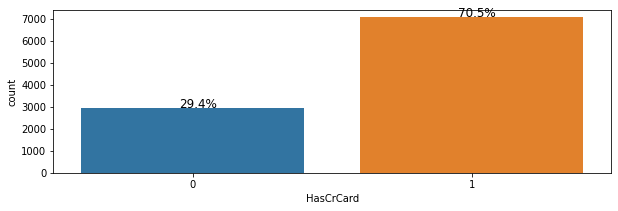

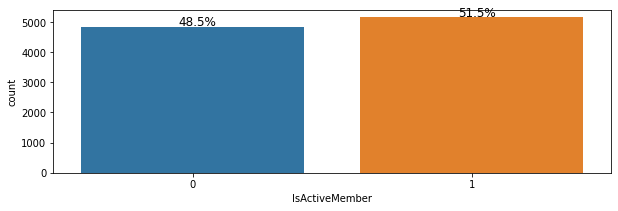

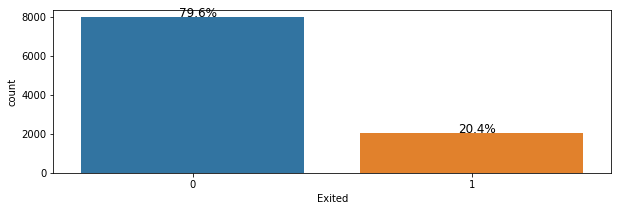

In [14]:
for var in ['Geography','Gender','Tenure','NumOfProducts','HasCrCard','IsActiveMember','Exited']:
    perc_on_bar(var)

### Insights univariate analysis

* The ```Credit score``` is very close to a normal distribution except for the right end of the distribution where it seems that credit scores have been capped to a maximum of 850.
* The ```Age``` follows a right skewed distribution. Although the boxplot seems to indicate the presence of outliers to the right end of the distribution, these are not real outliers and do not seem to be treated.
* The ```Balance``` follows a bimodal distribution with about 36% of customers having zero balance and the rest following a normal distribution
* The ```Estimated Salary``` is close to a uniform distribution ranging from 0 to 200,000 and centered on 100,000.
* About half of the customers are from France with a quarter of them from Spain and Germany
* Most customers are male (54.6%)
* The ```Tenure``` (period of time the customer has been with the bank) ranges from 0 to 10 years and follows a uniform distribution with an average of 5 years.
* Most customers own either one or two products with only 2.7% and 0.6 % of them owning 3 to 4 products respectively.
* 70 % of customers have a credit card while 30% do not.
* 51% of customers are active members.
* Only 20% have left the bank, hence the imbalanced nature of the dataset.

## Bivariate analysis

In [15]:
# Grouping data to display mean parameters for exited / non exited categories
data.groupby('Exited').mean()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
Exited,,,,,,,,
0,651.853196,37.408389,5.033279,72745.296779,1.544267,0.707146,0.554565,99738.391772
1,645.351497,44.837997,4.932744,91108.539337,1.475209,0.699067,0.360825,101465.677531


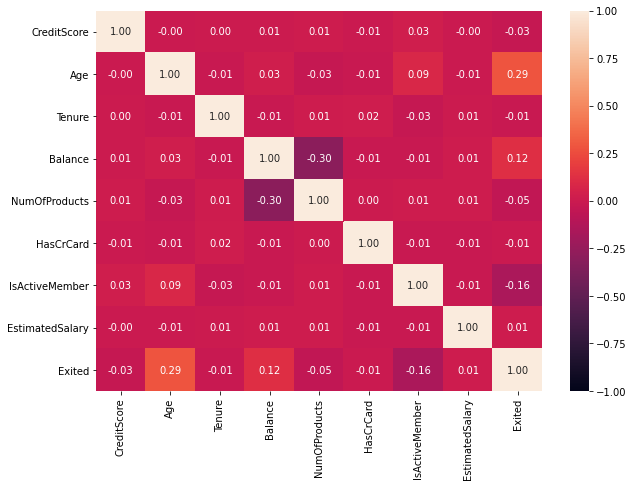

In [16]:
# Correlation matrix
plt.figure(figsize=(10,7))
sns.heatmap(data.corr(),annot=True, fmt='.2f', vmin=-1);

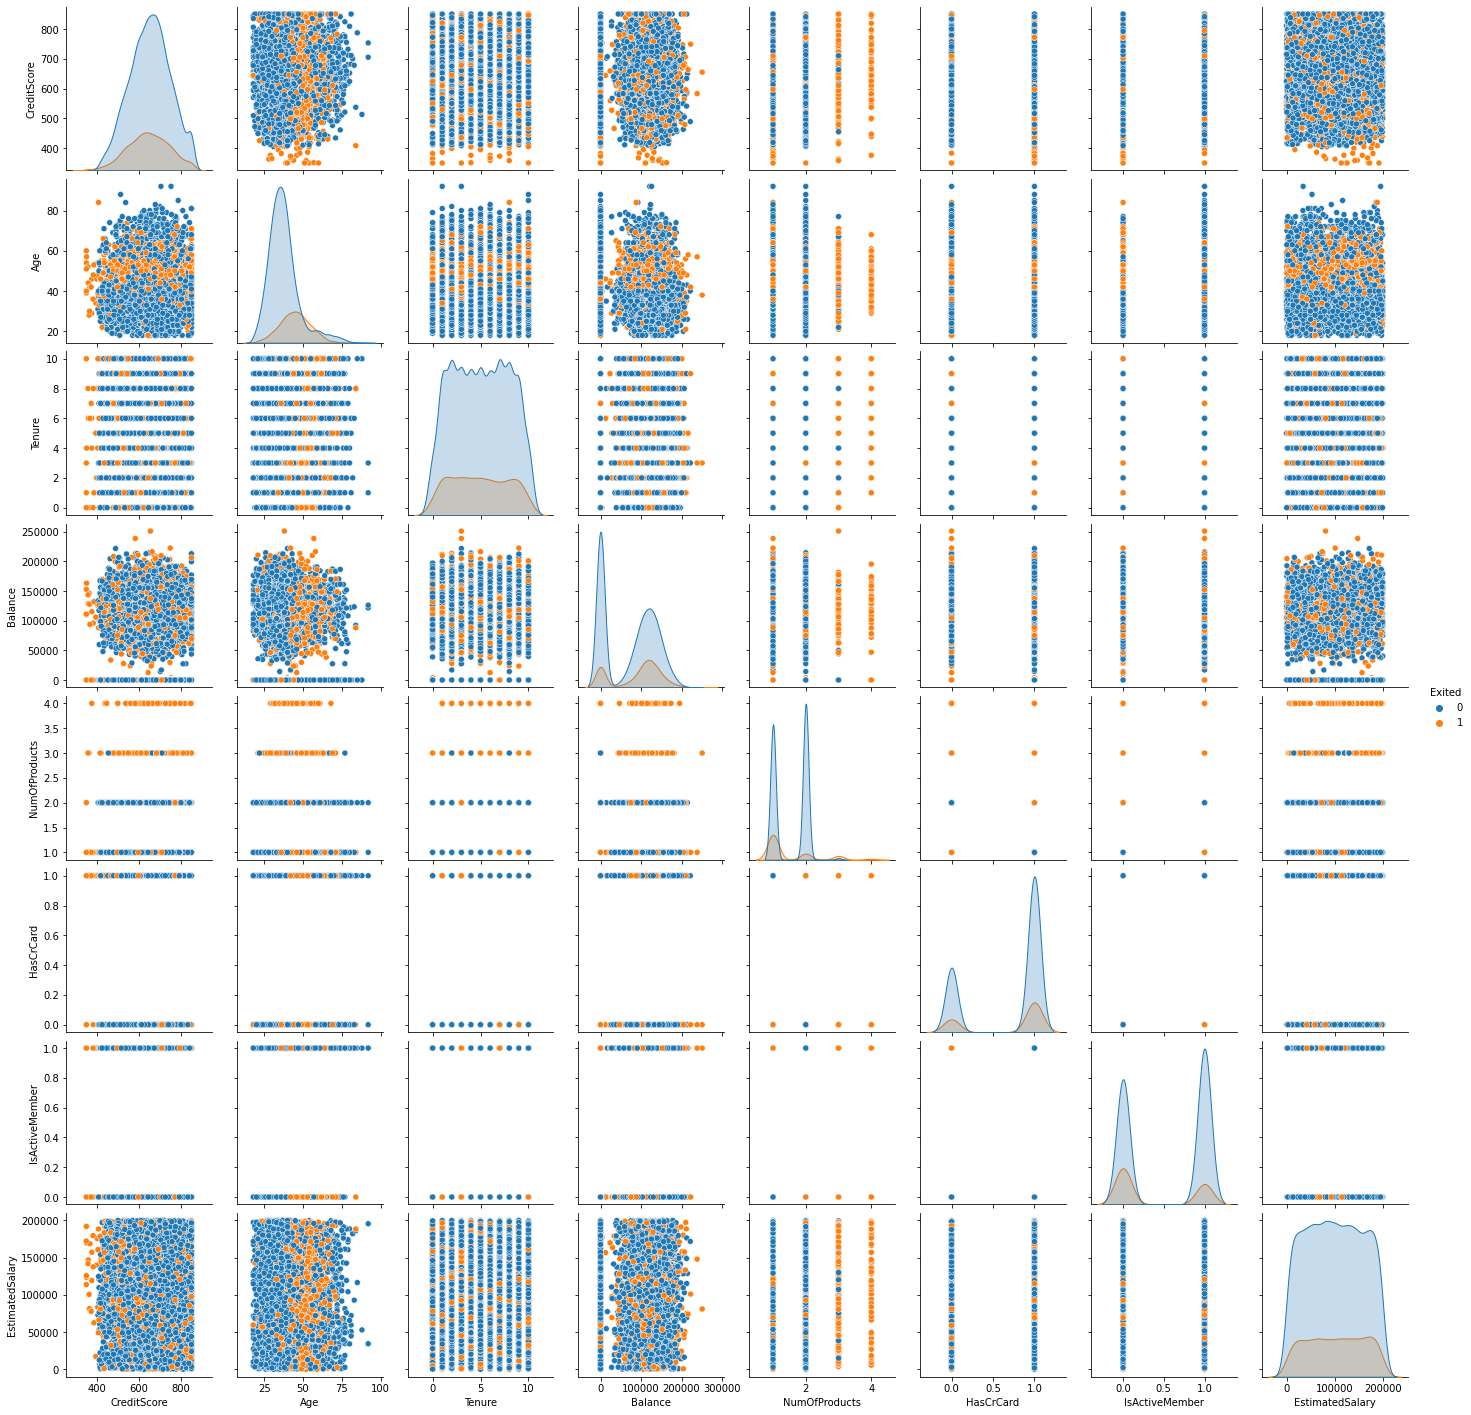

In [17]:
# Pair plots
sns.pairplot(data=data,hue="Exited");

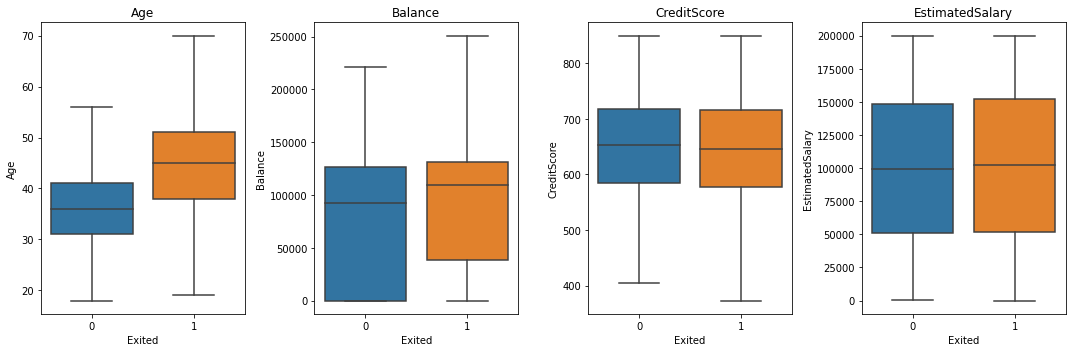

In [18]:
# Box plots for Age, Balance, CreditScore, EstimatedSalary vs Exited / Non exited categories
cols = ['Age', 'Balance', 'CreditScore', 'EstimatedSalary']
plt.figure(figsize=(15,5))

for i, variable in enumerate(cols):
                     plt.subplot(1,4,i+1)
                     sns.boxplot(x='Exited', y=variable, data=data, showfliers=False)
                     plt.tight_layout()
                     plt.title(variable)
plt.show()

In [19]:
def stacked_plot(x):
    tab1 = pd.crosstab(x,data['Exited'],margins=True)
    print(tab1)
    print('-'*120)
    tab = pd.crosstab(x,data['Exited'],normalize='index')
    tab.plot(kind='bar',stacked=True,figsize=(10,5))
    plt.legend(loc='lower left', frameon=False)
    plt.legend(loc="upper left", bbox_to_anchor=(1,1))
    plt.show()

Exited     0     1    All
Gender                   
Female  3404  1139   4543
Male    4559   898   5457
All     7963  2037  10000
------------------------------------------------------------------------------------------------------------------------


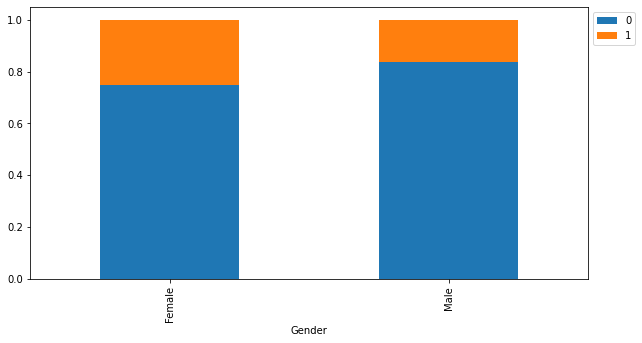

In [20]:
stacked_plot(data['Gender'])

Exited        0     1    All
Geography                   
France     4204   810   5014
Germany    1695   814   2509
Spain      2064   413   2477
All        7963  2037  10000
------------------------------------------------------------------------------------------------------------------------


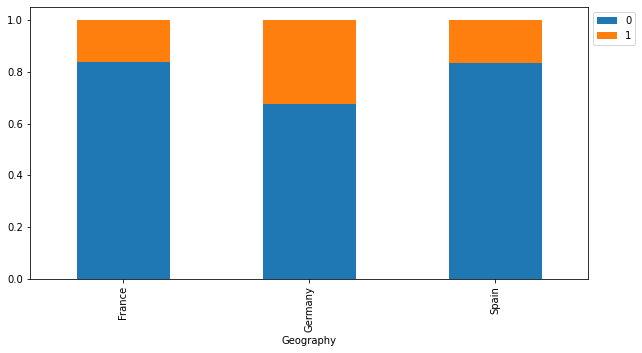

In [21]:
stacked_plot(data['Geography'])

Exited            0     1    All
NumOfProducts                   
1              3675  1409   5084
2              4242   348   4590
3                46   220    266
4                 0    60     60
All            7963  2037  10000
------------------------------------------------------------------------------------------------------------------------


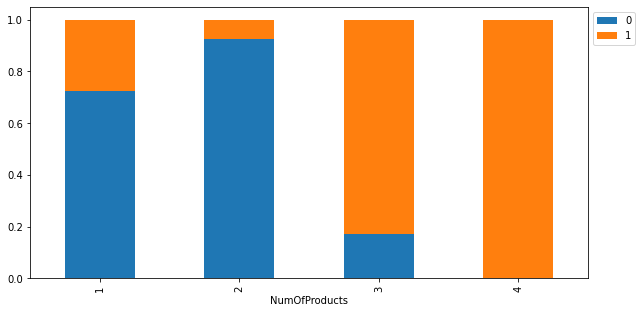

In [22]:
stacked_plot(data['NumOfProducts'])

### Insights bivariate analysis

* There are no very strong correlations between variables.
* The proportion of customers leaving the bank is higher among:
    - Older people
    - People with a higher balance on their bank account
    - Non active members
    - Germans
    - Females
    - Customers that own more than 2 products

# Data pre-processing

### Categorical encoding

In [23]:
# Converting categorical variables using One-Hot Encoding
data = pd.get_dummies(data,drop_first=True)

### Target and input variables

In [24]:
# Splitting target and input variables
X = data.drop('Exited', axis=1)
y = data['Exited']

### Train, validation and test split

In [25]:
# Splitting the data set into train, validation and test sets using stratify to keep imbalanced proportions
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1, stratify=y_train)

In [26]:
# Sizes of train, validation and test sets
print('Number of samples in train set:', len(X_train))
print('Number of samples in validation set:', len(X_val))
print('Number of samples in test set:', len(X_test))

Number of samples in train set: 6000
Number of samples in validation set: 2000
Number of samples in test set: 2000


### Scaling

In [27]:
# Scaling the data using sklearn standard scaler
Sc_X = StandardScaler()
X_train = Sc_X.fit_transform(X_train)
X_val = Sc_X.transform(X_val)
X_test = Sc_X.transform(X_test)

# Model Building

### Model 1 initialization

Let's create a simple sequential model using the Keras library.

In [28]:
#initialize the model
model_1 = Sequential()

### Adding layers of neurons to the model

First, let's start with a simple neural network made of 1 input layer of 20 neurons, 1 hidden layer of 5 neurons and 1 output layer of 1 neuron.

For the input and hidden layers we will use the ReLU function for activation while we will use the Sigmoid function for the ouput layer in order to get a probability ranging from 0 to 1.

In [29]:
# Input layer with 20 neurons connected an input of 11 columns
model_1.add(Dense(units=20, input_dim = X_train.shape[1], activation='relu'))

# Hidden layer with 5 neurons
model_1.add(Dense(units=5,activation='relu'))

# Output layer with 1 neuron
model_1.add(Dense(1,activation='sigmoid'))

### Metrics definition

In [30]:
# Metrics definition in Keras in order to compute accuracy, precision and recall
METRICS = [ 
      tf.keras.metrics.BinaryAccuracy(name='accuracy'),
      tf.keras.metrics.Precision(name='precision'),
      tf.keras.metrics.Recall(name='recall'),
]

### Model 1 compilation

In [31]:
# Use Adam optimizer with default learning rate and binary_crossentropy loss function
model_1.compile(optimizer='adam',loss='binary_crossentropy',metrics=METRICS)

In [32]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 20)                240       
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 105       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 6         
Total params: 351
Trainable params: 351
Non-trainable params: 0
_________________________________________________________________


The model has a total of 351 parameters including weights and biases.

### Model 1 training

Let's train our model over 100 epochs

In [33]:
# Model training

EPOCHS = 100 # Number of epochs

history=model_1.fit(X_train, y_train, epochs=EPOCHS, validation_data=(X_val,y_val))

Epoch 1/100
188/188 [==============================] - 1s 4ms/step - loss: 0.5320 - accuracy: 0.7547 - precision: 0.2185 - recall: 0.0794 - val_loss: 0.4527 - val_accuracy: 0.7985 - val_precision: 0.7778 - val_recall: 0.0172
Epoch 2/100
188/188 [==============================] - 0s 1ms/step - loss: 0.4368 - accuracy: 0.8032 - precision: 0.6541 - recall: 0.0712 - val_loss: 0.4149 - val_accuracy: 0.8175 - val_precision: 0.7529 - val_recall: 0.1569
Epoch 3/100
188/188 [==============================] - 0s 1ms/step - loss: 0.4042 - accuracy: 0.8263 - precision: 0.7261 - recall: 0.2365 - val_loss: 0.3967 - val_accuracy: 0.8310 - val_precision: 0.7365 - val_recall: 0.2672
Epoch 4/100
188/188 [==============================] - 0s 1ms/step - loss: 0.3828 - accuracy: 0.8443 - precision: 0.7562 - recall: 0.3478 - val_loss: 0.3818 - val_accuracy: 0.8400 - val_precision: 0.7316 - val_recall: 0.3407
Epoch 5/100
188/188 [==============================] - 0s 1ms/step - loss: 0.3671 - accuracy: 0.8518

188/188 [==============================] - 0s 1ms/step - loss: 0.3235 - accuracy: 0.8647 - precision: 0.7628 - recall: 0.4869 - val_loss: 0.3530 - val_accuracy: 0.8565 - val_precision: 0.7449 - val_recall: 0.4510
Epoch 38/100
188/188 [==============================] - 0s 1ms/step - loss: 0.3229 - accuracy: 0.8665 - precision: 0.7826 - recall: 0.4771 - val_loss: 0.3517 - val_accuracy: 0.8545 - val_precision: 0.7159 - val_recall: 0.4755
Epoch 39/100
188/188 [==============================] - 0s 1ms/step - loss: 0.3236 - accuracy: 0.8673 - precision: 0.7689 - recall: 0.4984 - val_loss: 0.3520 - val_accuracy: 0.8530 - val_precision: 0.7209 - val_recall: 0.4559
Epoch 40/100
188/188 [==============================] - 0s 1ms/step - loss: 0.3225 - accuracy: 0.8688 - precision: 0.7821 - recall: 0.4935 - val_loss: 0.3538 - val_accuracy: 0.8520 - val_precision: 0.7373 - val_recall: 0.4265
Epoch 41/100
188/188 [==============================] - 0s 2ms/step - loss: 0.3218 - accuracy: 0.8673 - preci

188/188 [==============================] - 0s 1ms/step - loss: 0.3152 - accuracy: 0.8698 - precision: 0.7831 - recall: 0.4992 - val_loss: 0.3547 - val_accuracy: 0.8490 - val_precision: 0.6866 - val_recall: 0.4779
Epoch 74/100
188/188 [==============================] - 0s 1ms/step - loss: 0.3150 - accuracy: 0.8698 - precision: 0.7774 - recall: 0.5057 - val_loss: 0.3532 - val_accuracy: 0.8525 - val_precision: 0.7070 - val_recall: 0.4730
Epoch 75/100
188/188 [==============================] - 0s 1ms/step - loss: 0.3149 - accuracy: 0.8697 - precision: 0.7792 - recall: 0.5025 - val_loss: 0.3530 - val_accuracy: 0.8555 - val_precision: 0.7245 - val_recall: 0.4706
Epoch 76/100
188/188 [==============================] - 0s 1ms/step - loss: 0.3142 - accuracy: 0.8697 - precision: 0.7835 - recall: 0.4975 - val_loss: 0.3534 - val_accuracy: 0.8515 - val_precision: 0.7048 - val_recall: 0.4681
Epoch 77/100
188/188 [==============================] - 0s 1ms/step - loss: 0.3148 - accuracy: 0.8695 - preci

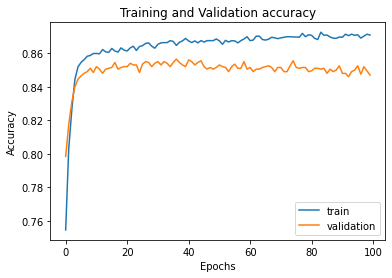

In [34]:
# Capturing learning history per epoch
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch

# Plotting recall at different epochs
plt.title("Training and Validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.plot(hist['accuracy'])
plt.plot(hist['val_accuracy'])
plt.legend(("train" , "validation") , loc=0);

## Criterion for model evaluation

The model can make two kind of wrong predictions:
* Predicting that the customer will leave the bank while he will remain.
* Predicting that the customer will remain in the bank while he will leave.

Which error will have the most impact to the bank?
* Failing to identify properly those customers that will leave the bank would be more harmful to the bank than predicting that a customer will leave the bank while he will remain. We want therefore to minimize in priority the number of `False Negative` hence maximizing the `Recall`.

## Model 1 performance

First, let's evaluate our model's performance based on **Recall**

In [35]:
# Performance on train set:
train_scores_1 = model_1.evaluate(X_train, y_train)

188/188 [==============================] - 0s 893us/step - loss: 0.3087 - accuracy: 0.8708 - precision: 0.7945 - recall: 0.4935


In [36]:
# Performance on validation set:
val_scores_1 = model_1.evaluate(X_val, y_val)

63/63 [==============================] - 0s 1ms/step - loss: 0.3593 - accuracy: 0.8470 - precision: 0.6992 - recall: 0.4387


In [37]:
# Performance on test set:
test_scores_1 = model_1.evaluate(X_test, y_test)

63/63 [==============================] - 0s 1ms/step - loss: 0.3559 - accuracy: 0.8595 - precision: 0.7669 - recall: 0.4447


In [38]:
# Function to compute confusion matrix
def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):
    '''
    This function will make a pretty plot of an sklearn Confusion Matrix cm using a Seaborn heatmap visualization.
    Arguments
    '''


    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)
    
    if title:
        plt.title(title)

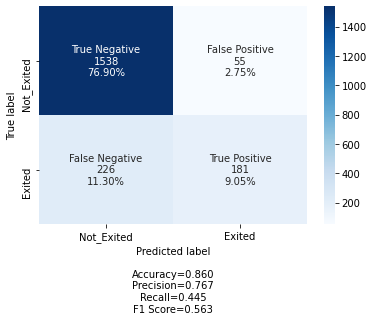

In [39]:
## Confusion Matrix on unseen test set

y_pred1 = model_1.predict(X_test)

for i in range(len(y_test)): 
    if y_pred1[i]>0.5: # Using default threshold of 0.5 for probability
        y_pred1[i]=1 
    else:
        y_pred1[i]=0

cm1=confusion_matrix(y_test, y_pred1)
labels = ['True Negative','False Positive','False Negative','True Positive']
categories = ['Not_Exited','Exited']

make_confusion_matrix(cm1, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')

### Comments
* Although the accuracy and precision may seem good, the performance of the model remains poor with a Recall of only 44.5%.
* Out of the 2,000 customers present in the test set, the model failed to detect 226 customers that left the bank.
* The recall for the train set was higher with 49.3% meaning that the model is slightly overfitting.

### ROC curve

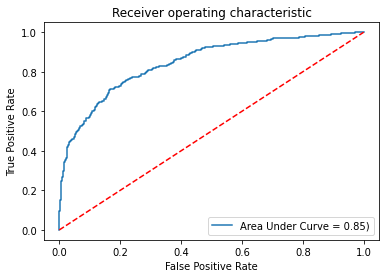

In [42]:
# ROC-AUC curve
logit_roc_auc = roc_auc_score(y_test, model_1.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, model_1.predict(X_test)) 
plt.figure()
plt.plot(fpr, tpr, label='Area Under Curve = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

### Precision vs Recall

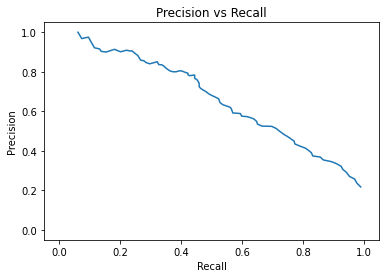

In [43]:
thresholds = np.arange(0.01, 1, .01)
recalls = []
precisions = []

for t in thresholds:
    y_pred_1 = model_1.predict(X_test)
    
    for i in range(len(y_test)):
        if y_pred_1[i] > t:
            y_pred_1[i] = 1
        else:
            y_pred_1[i] = 0
        
    recalls.append(recall_score(y_test, y_pred_1))
    precisions.append(precision_score(y_test, y_pred_1))

plt.figure()
plt.plot(recalls, precisions)
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision vs Recall')
plt.show()

As we can see from the plot above there is a trade-off between precision and recall. Previously a default probability threshold of 50% had been used to determine whether the customer would leave or not. If we decrease the threshold, we will increase the number of false positive and decrease the number of false negative hence increasing recall and decreasing precision.

##  Model 2:  adjust probability threshold to 20%

In [44]:
# Model initialization
model_2 = Sequential([
    Dense(units=20, input_dim = X_train.shape[1], activation='relu'),
    Dense(units=5,activation='relu'),
    Dense(1,activation='sigmoid')
    ])

In [45]:
# Metrics definition
METRICS = [ 
      tf.keras.metrics.BinaryAccuracy(name='accuracy', threshold=0.2), # adjusting probability threshold to 0.2
      tf.keras.metrics.Precision(name='precision', thresholds=0.2), # adjusting probability threshold to 0.2
      tf.keras.metrics.Recall(name='recall', thresholds=0.2), # adjusting probability threshold to 0.2
]

In [46]:
# Use Adam optimizer with default learning rate and binary_crossentropy loss function
model_2.compile(optimizer='adam',loss='binary_crossentropy',metrics=METRICS)

In [47]:
# Model training
EPOCHS = 100 # Number of epochs

history=model_2.fit(X_train, y_train, epochs=EPOCHS, validation_data=(X_val,y_val))

Epoch 1/100
188/188 [==============================] - 2s 4ms/step - loss: 0.5324 - accuracy: 0.3493 - precision: 0.2211 - recall: 0.8699 - val_loss: 0.4582 - val_accuracy: 0.5860 - val_precision: 0.3015 - val_recall: 0.7819
Epoch 2/100
188/188 [==============================] - 0s 2ms/step - loss: 0.4361 - accuracy: 0.6600 - precision: 0.3446 - recall: 0.7422 - val_loss: 0.4120 - val_accuracy: 0.6960 - val_precision: 0.3798 - val_recall: 0.7745
Epoch 3/100
188/188 [==============================] - 0s 1ms/step - loss: 0.4020 - accuracy: 0.7117 - precision: 0.3920 - recall: 0.7545 - val_loss: 0.3887 - val_accuracy: 0.7565 - val_precision: 0.4430 - val_recall: 0.7525
Epoch 4/100
188/188 [==============================] - 0s 1ms/step - loss: 0.3807 - accuracy: 0.7457 - precision: 0.4297 - recall: 0.7602 - val_loss: 0.3739 - val_accuracy: 0.7590 - val_precision: 0.4483 - val_recall: 0.7868
Epoch 5/100
188/188 [==============================] - 0s 1ms/step - loss: 0.3672 - accuracy: 0.7583

188/188 [==============================] - 0s 1ms/step - loss: 0.3293 - accuracy: 0.7845 - precision: 0.4819 - recall: 0.7741 - val_loss: 0.3531 - val_accuracy: 0.7915 - val_precision: 0.4927 - val_recall: 0.7426
Epoch 38/100
188/188 [==============================] - 0s 1ms/step - loss: 0.3289 - accuracy: 0.7860 - precision: 0.4842 - recall: 0.7758 - val_loss: 0.3532 - val_accuracy: 0.7950 - val_precision: 0.4984 - val_recall: 0.7426
Epoch 39/100
188/188 [==============================] - 0s 2ms/step - loss: 0.3285 - accuracy: 0.7900 - precision: 0.4901 - recall: 0.7717 - val_loss: 0.3528 - val_accuracy: 0.7885 - val_precision: 0.4882 - val_recall: 0.7574
Epoch 40/100
188/188 [==============================] - 0s 2ms/step - loss: 0.3282 - accuracy: 0.7865 - precision: 0.4848 - recall: 0.7709 - val_loss: 0.3530 - val_accuracy: 0.7915 - val_precision: 0.4928 - val_recall: 0.7549
Epoch 41/100
188/188 [==============================] - 0s 1ms/step - loss: 0.3279 - accuracy: 0.7873 - preci

188/188 [==============================] - 0s 1ms/step - loss: 0.3209 - accuracy: 0.7937 - precision: 0.4959 - recall: 0.7848 - val_loss: 0.3538 - val_accuracy: 0.7875 - val_precision: 0.4865 - val_recall: 0.7500
Epoch 74/100
188/188 [==============================] - 0s 1ms/step - loss: 0.3208 - accuracy: 0.7957 - precision: 0.4989 - recall: 0.7758 - val_loss: 0.3539 - val_accuracy: 0.7825 - val_precision: 0.4794 - val_recall: 0.7696
Epoch 75/100
188/188 [==============================] - 0s 1ms/step - loss: 0.3206 - accuracy: 0.7962 - precision: 0.4997 - recall: 0.7897 - val_loss: 0.3540 - val_accuracy: 0.7920 - val_precision: 0.4937 - val_recall: 0.7647
Epoch 76/100
188/188 [==============================] - 0s 1ms/step - loss: 0.3202 - accuracy: 0.7952 - precision: 0.4982 - recall: 0.7840 - val_loss: 0.3535 - val_accuracy: 0.7840 - val_precision: 0.4816 - val_recall: 0.7696
Epoch 77/100
188/188 [==============================] - 0s 1ms/step - loss: 0.3200 - accuracy: 0.7940 - preci

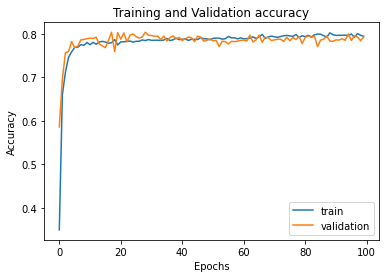

In [48]:
# Capturing learning history per epoch
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch

# Plotting recall at different epochs
plt.title("Training and Validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.plot(hist['accuracy'])
plt.plot(hist['val_accuracy'])
plt.legend(("train" , "validation") , loc=0);

In [49]:
# Model 2 performance:
print('Train scores:')
train_scores_2 = model_2.evaluate(X_train, y_train)
print('Validation scores:')
train_scores_2 = model_2.evaluate(X_val, y_val)
print('Test scores:')
test_scores_2 = model_2.evaluate(X_test, y_test)

Train scores:
188/188 [==============================] - 0s 952us/step - loss: 0.3136 - accuracy: 0.8015 - precision: 0.5082 - recall: 0.7872
Validation scores:
63/63 [==============================] - 0s 823us/step - loss: 0.3566 - accuracy: 0.7930 - precision: 0.4952 - recall: 0.7549
Test scores:
63/63 [==============================] - 0s 1ms/step - loss: 0.3598 - accuracy: 0.7780 - precision: 0.4707 - recall: 0.7297


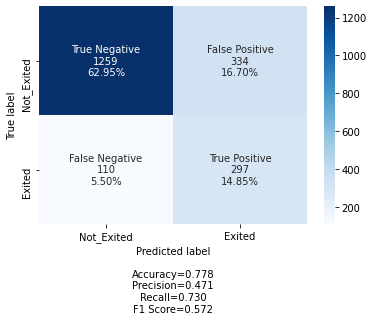

In [50]:
## Confusion Matrix using probability threshold of 0.2

y_pred2 = model_2.predict(X_test)

for i in range(len(y_test)): 
    if y_pred2[i] > 0.2: # Ajusting threshold to 0.2
        y_pred2[i] = 1 
    else:
        y_pred2[i] = 0

cm2=confusion_matrix(y_test, y_pred2)
labels = ['True Negative','False Positive','False Negative','True Positive']
categories = ['Not_Exited','Exited']

make_confusion_matrix(cm2, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')

### Comments 

* As we can see from the confusion matrix displayed above, by adjusting the probability threshold to 20%, alhtough the accuracy of the model has dropped, the recall has increased from 44.5% to 73.0% while the precision has decreased from 76.7% to 47.1%.
* However, the model is overfitting as the recall for the test and validations sets remains significantly lower than for the train set.

## Model 3: Adding dropout to reduce overfitting

In [51]:
# Model 3 initialization
model_3 = Sequential([
    Dense(units=20, input_dim = X_train.shape[1], activation='relu'),
    Dropout(.5), # Adding 50% dropout to reduce model's overfitting
    Dense(units=5,activation='relu'),
    Dense(1,activation='sigmoid')
    ])

In [52]:
# Use Adam optimizer with default learning rate and binary_crossentropy loss function
model_3.compile(optimizer='adam',loss='binary_crossentropy',metrics=METRICS)

In [53]:
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 20)                240       
_________________________________________________________________
dropout (Dropout)            (None, 20)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 5)                 105       
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 6         
Total params: 351
Trainable params: 351
Non-trainable params: 0
_________________________________________________________________


In [54]:
# Model training
EPOCHS = 100 # Number of epochs

history=model_3.fit(X_train, y_train, epochs=EPOCHS, validation_data=(X_val,y_val))

Epoch 1/100
188/188 [==============================] - 2s 3ms/step - loss: 0.5283 - accuracy: 0.5408 - precision: 0.2685 - recall: 0.7281 - val_loss: 0.4657 - val_accuracy: 0.5450 - val_precision: 0.2847 - val_recall: 0.8137
Epoch 2/100
188/188 [==============================] - 0s 2ms/step - loss: 0.4865 - accuracy: 0.5620 - precision: 0.2774 - recall: 0.7169 - val_loss: 0.4496 - val_accuracy: 0.5895 - val_precision: 0.3075 - val_recall: 0.8088
Epoch 3/100
188/188 [==============================] - 0s 2ms/step - loss: 0.4707 - accuracy: 0.5792 - precision: 0.2894 - recall: 0.7324 - val_loss: 0.4438 - val_accuracy: 0.5975 - val_precision: 0.3153 - val_recall: 0.8309
Epoch 4/100
188/188 [==============================] - 0s 2ms/step - loss: 0.4645 - accuracy: 0.5857 - precision: 0.2959 - recall: 0.7496 - val_loss: 0.4368 - val_accuracy: 0.6520 - val_precision: 0.3465 - val_recall: 0.7966
Epoch 5/100
188/188 [==============================] - 0s 2ms/step - loss: 0.4555 - accuracy: 0.6173

188/188 [==============================] - 0s 2ms/step - loss: 0.3736 - accuracy: 0.7402 - precision: 0.4241 - recall: 0.7700 - val_loss: 0.3582 - val_accuracy: 0.7655 - val_precision: 0.4566 - val_recall: 0.7868
Epoch 38/100
188/188 [==============================] - 0s 2ms/step - loss: 0.3826 - accuracy: 0.7418 - precision: 0.4252 - recall: 0.7610 - val_loss: 0.3599 - val_accuracy: 0.7405 - val_precision: 0.4284 - val_recall: 0.8137
Epoch 39/100
188/188 [==============================] - 0s 2ms/step - loss: 0.3791 - accuracy: 0.7433 - precision: 0.4276 - recall: 0.7684 - val_loss: 0.3599 - val_accuracy: 0.7465 - val_precision: 0.4337 - val_recall: 0.7941
Epoch 40/100
188/188 [==============================] - 0s 2ms/step - loss: 0.3755 - accuracy: 0.7468 - precision: 0.4314 - recall: 0.7643 - val_loss: 0.3593 - val_accuracy: 0.7465 - val_precision: 0.4343 - val_recall: 0.8015
Epoch 41/100
188/188 [==============================] - 0s 2ms/step - loss: 0.3755 - accuracy: 0.7482 - preci

Epoch 73/100
188/188 [==============================] - 0s 2ms/step - loss: 0.3732 - accuracy: 0.7443 - precision: 0.4286 - recall: 0.7660 - val_loss: 0.3623 - val_accuracy: 0.7200 - val_precision: 0.4091 - val_recall: 0.8382
Epoch 74/100
188/188 [==============================] - 0s 1ms/step - loss: 0.3740 - accuracy: 0.7395 - precision: 0.4220 - recall: 0.7553 - val_loss: 0.3613 - val_accuracy: 0.7275 - val_precision: 0.4166 - val_recall: 0.8382
Epoch 75/100
188/188 [==============================] - 0s 2ms/step - loss: 0.3733 - accuracy: 0.7473 - precision: 0.4323 - recall: 0.7684 - val_loss: 0.3593 - val_accuracy: 0.7350 - val_precision: 0.4234 - val_recall: 0.8260
Epoch 76/100
188/188 [==============================] - 0s 2ms/step - loss: 0.3652 - accuracy: 0.7528 - precision: 0.4403 - recall: 0.7872 - val_loss: 0.3611 - val_accuracy: 0.7230 - val_precision: 0.4118 - val_recall: 0.8358
Epoch 77/100
188/188 [==============================] - 0s 2ms/step - loss: 0.3699 - accuracy: 0

In [55]:
# Model 3 performance:
print('Train scores:')
train_scores_3 = model_3.evaluate(X_train, y_train)
print('Validation scores:')
train_scores_3 = model_3.evaluate(X_val, y_val)
print('Test scores:')
test_scores_3 = model_3.evaluate(X_test, y_test)

Train scores:
188/188 [==============================] - 0s 1ms/step - loss: 0.3461 - accuracy: 0.7175 - precision: 0.4073 - recall: 0.8502
Validation scores:
63/63 [==============================] - 0s 1ms/step - loss: 0.3592 - accuracy: 0.7215 - precision: 0.4103 - recall: 0.8358
Test scores:
63/63 [==============================] - 0s 1ms/step - loss: 0.3657 - accuracy: 0.7065 - precision: 0.3963 - recall: 0.8452


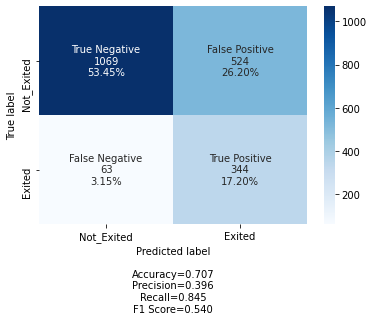

In [56]:
## Confusion Matrix

y_pred3 = model_3.predict(X_test)

for i in range(len(y_test)): 
    if y_pred3[i] > 0.2:
        y_pred3[i] = 1 
    else:
        y_pred3[i] = 0

cm3=confusion_matrix(y_test, y_pred3)
labels = ['True Negative','False Positive','False Negative','True Positive']
categories = ['Not_Exited','Exited']

make_confusion_matrix(cm3, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')

### Comments

* The 50% drop out allows to reduce the overfitting and hence increase the model's performance on the test set.

## Model 4: Complex model with more layers and neurons

In [57]:
# Model 4 initialization
model_4 = Sequential([
    Dense(units=50, input_dim = X_train.shape[1], activation='relu'),
    Dropout(.5), # Adding 50% dropout to reduce model's overfitting
    Dense(units=10, activation='relu'),
    Dense(units=3,activation='relu'),
    Dense(1,activation='sigmoid')
    ])

In [58]:
# Use Adam optimizer with default learning rate and binary_crossentropy loss function
model_4.compile(optimizer='adam',loss='binary_crossentropy',metrics=METRICS)

In [59]:
model_4.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 50)                600       
_________________________________________________________________
dropout_1 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_10 (Dense)             (None, 10)                510       
_________________________________________________________________
dense_11 (Dense)             (None, 3)                 33        
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 4         
Total params: 1,147
Trainable params: 1,147
Non-trainable params: 0
_________________________________________________________________


The number of parameters in the neural network including weights and biases has increased from 351 to 1,147.

In [60]:
# Model training
EPOCHS = 100 # Number of epochs

history=model_4.fit(X_train, y_train, batch_size=60, epochs=EPOCHS, validation_data=(X_val,y_val))

Epoch 1/100
100/100 [==============================] - 1s 7ms/step - loss: 0.5520 - accuracy: 0.4448 - precision: 0.2418 - recall: 0.8085 - val_loss: 0.4769 - val_accuracy: 0.4120 - val_precision: 0.2450 - val_recall: 0.9044
Epoch 2/100
100/100 [==============================] - 0s 2ms/step - loss: 0.4794 - accuracy: 0.5748 - precision: 0.2800 - recall: 0.6923 - val_loss: 0.4436 - val_accuracy: 0.5975 - val_precision: 0.3153 - val_recall: 0.8309
Epoch 3/100
100/100 [==============================] - 0s 2ms/step - loss: 0.4625 - accuracy: 0.6158 - precision: 0.3098 - recall: 0.7218 - val_loss: 0.4276 - val_accuracy: 0.6595 - val_precision: 0.3502 - val_recall: 0.7819
Epoch 4/100
100/100 [==============================] - 0s 2ms/step - loss: 0.4482 - accuracy: 0.6403 - precision: 0.3284 - recall: 0.7332 - val_loss: 0.4200 - val_accuracy: 0.6855 - val_precision: 0.3695 - val_recall: 0.7672
Epoch 5/100
100/100 [==============================] - 0s 2ms/step - loss: 0.4481 - accuracy: 0.6522

100/100 [==============================] - 0s 2ms/step - loss: 0.3538 - accuracy: 0.7808 - precision: 0.4758 - recall: 0.7480 - val_loss: 0.3474 - val_accuracy: 0.7835 - val_precision: 0.4807 - val_recall: 0.7647
Epoch 38/100
100/100 [==============================] - 0s 2ms/step - loss: 0.3445 - accuracy: 0.7945 - precision: 0.4970 - recall: 0.7373 - val_loss: 0.3462 - val_accuracy: 0.7820 - val_precision: 0.4785 - val_recall: 0.7623
Epoch 39/100
100/100 [==============================] - 0s 2ms/step - loss: 0.3444 - accuracy: 0.7853 - precision: 0.4825 - recall: 0.7455 - val_loss: 0.3448 - val_accuracy: 0.7955 - val_precision: 0.4992 - val_recall: 0.7574
Epoch 40/100
100/100 [==============================] - 0s 2ms/step - loss: 0.3489 - accuracy: 0.7907 - precision: 0.4908 - recall: 0.7414 - val_loss: 0.3452 - val_accuracy: 0.7900 - val_precision: 0.4906 - val_recall: 0.7647
Epoch 41/100
100/100 [==============================] - 0s 2ms/step - loss: 0.3490 - accuracy: 0.7890 - preci

100/100 [==============================] - 0s 2ms/step - loss: 0.3375 - accuracy: 0.7953 - precision: 0.4984 - recall: 0.7537 - val_loss: 0.3439 - val_accuracy: 0.7910 - val_precision: 0.4922 - val_recall: 0.7721
Epoch 74/100
100/100 [==============================] - 0s 2ms/step - loss: 0.3351 - accuracy: 0.7920 - precision: 0.4931 - recall: 0.7643 - val_loss: 0.3440 - val_accuracy: 0.7960 - val_precision: 0.5000 - val_recall: 0.7696
Epoch 75/100
100/100 [==============================] - 0s 2ms/step - loss: 0.3329 - accuracy: 0.7923 - precision: 0.4936 - recall: 0.7627 - val_loss: 0.3439 - val_accuracy: 0.8005 - val_precision: 0.5074 - val_recall: 0.7525
Epoch 76/100
100/100 [==============================] - 0s 2ms/step - loss: 0.3345 - accuracy: 0.7973 - precision: 0.5016 - recall: 0.7610 - val_loss: 0.3439 - val_accuracy: 0.7890 - val_precision: 0.4891 - val_recall: 0.7696
Epoch 77/100
100/100 [==============================] - 0s 2ms/step - loss: 0.3348 - accuracy: 0.7875 - preci

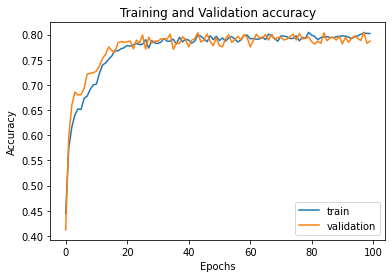

In [61]:
# Capturing learning history per epoch
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch

# Plotting recall at different epochs
plt.title("Training and Validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.plot(hist['accuracy'])
plt.plot(hist['val_accuracy'])
plt.legend(("train" , "validation") , loc=0);

In [62]:
# Model 4 performance:
print('Train scores:')
train_scores_4 = model_4.evaluate(X_train, y_train)
print('Validation scores:')
train_scores_4 = model_4.evaluate(X_val, y_val)
print('Test scores:')
test_scores_4 = model_4.evaluate(X_test, y_test)

Train scores:
188/188 [==============================] - 0s 1ms/step - loss: 0.3091 - accuracy: 0.7945 - precision: 0.4972 - recall: 0.8061
Validation scores:
63/63 [==============================] - 0s 1ms/step - loss: 0.3437 - accuracy: 0.7870 - precision: 0.4859 - recall: 0.7623
Test scores:
63/63 [==============================] - 0s 1ms/step - loss: 0.3411 - accuracy: 0.7795 - precision: 0.4742 - recall: 0.7666


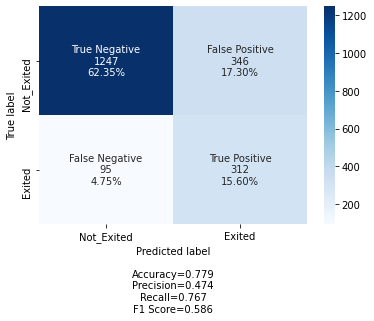

In [63]:
## Confusion Matrix using probability threshold of 0.2

y_pred4 = model_4.predict(X_test)

for i in range(len(y_test)): 
    if y_pred4[i] > 0.2: # Ajusting threshold to 0.2
        y_pred4[i] = 1 
    else:
        y_pred4[i] = 0

cm4=confusion_matrix(y_test, y_pred4)
labels = ['True Negative','False Positive','False Negative','True Positive']
categories = ['Not_Exited','Exited']

make_confusion_matrix(cm4, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')

### Comments
* Adding more layers and neurons to the network did not help improving the model's performance.
* The performance of the model remains comparable to the previous model with a slightly higher precision and lower recall.

# Models Performance Evaluation

In [64]:
# defining list of models test scores
scores = [test_scores_1, test_scores_2, test_scores_3, test_scores_4]

# defining empty lists for test results
loss_test = []
accuracy_test = []
precision_test = []
recall_test = []

# looping through all the models test scores to get the Loss, Accuracy, Precision and Recall
for score in scores:
    loss_test.append(round(score[0],3))
    accuracy_test.append(round(score[1],3))
    precision_test.append(round(score[2],3))
    recall_test.append(round(score[3],3))

comparison_frame = pd.DataFrame(index=['Model 1: Simple', 'Model 2: 20% Threshold', 'Model 3: Adding Dropout',
                                      'Model 4: More layers and neurons'],
                                data= {'Test_Loss': loss_test,'Test_Accuracy': accuracy_test,
                                       'Test_Precision':precision_test,'Test_Recall':recall_test} 
                                ) 

comparison_frame

,Test_Loss,Test_Accuracy,Test_Precision,Test_Recall
Model 1: Simple,0.356,0.859,0.767,0.445
Model 2: 20% Threshold,0.360,0.778,0.471,0.730
Model 3: Adding Dropout,0.366,0.706,0.396,0.845
Model 4: More layers and neurons,0.341,0.780,0.474,0.767


### Comments

Four artificial neural network models have been evaluated based on their ability to predict if the customer will leave the bank.
* Models 3 and 4 show the best performances.
* The best recall was achieved with model 3 with a recall of 84.5% and a precision of 39.6% on the test set.
* Setting a lower probability threshold of 20% allowed to increase the recall at the expense of the model's precision.
* Adding a 50% drop out to the neurons allowed to reduce the overfitting and increase the model's overall performance.
* Adding more layers and neurons to the network did not help to improve the model's performance significantly.

# Conclusions

* An artificial neural network has been built with a satisfactory ability to predict if the customer will leave the bank or not (84.5% recall, 39.6% precision and 70.6% accuracy)
* Depending on the bank's objectives, the probability threshold can be ajusted in order to get a higher recall or precision.
* It should also be noted that the proportion of customers leaving the bank is higher among:
    * Older people
    * People with a higher balance on their bank account
    * Non active members
    * Germans
    * Females
    * Customers that own more than 2 products